#**Qu'est-ce que la régression avec un réseau de neurone ?**

Un réseau de neurone artificiel est un modèle de machiune learning permettant de réaliser un modèle de régression, soit une approche d'une variable suivant une ou plusieurs variables indépendantes qui lui sont correlées.

Nous pouvons donc :
- Prédire le prix de vente d'un bien suivant certains facteurs;
- Prédire les coordonnées d'une Bounding Box d'une image;
- Prédire le coût d'une assurance suivant les données démographique d'un personne;
- ...

##**Ce que nous allons voir**

Dans cette étape nous allons voir 
- L'architecture d'un modèle neuronal
- l'Input shape et l'Output shape :
  - x = feature
  - y = label
- Créer des données et les entrainer
- Etape de modélisation





In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


#Créer des données et les entrainer

## Créer les données

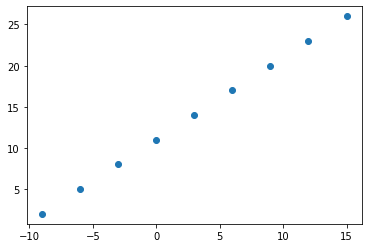

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Création de données
X = np.array([-9.0,-6.0, -3.0, 0.0, 3.0, 6.0, 9.0, 12.0, 15.0])

#Créer Label
y= np.array([2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0])

#Visualisation des données
plt.scatter(X,y)


In [ ]:
y == X+11

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

Nous avons ici nos données X que nous avons mis en relation avec les données y.
- Y = x+11
- Maintenant le but serait de prédire quelle serait y si X était pioché au hasard.
ATTENTION, ici nous avons un seul X mis en relation avec y.
- Shape X = 1
- Shape y = 1

mais nous pourrions aussi avoir :
- Shape X = 3
- Shape y = 1


## Entrée et sortie du modèle

In [ ]:
# Create 
house_info = tf.constant(['Bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

Dans notre cas, nous avons 3 informations qui prédisent un seul prix

Nous remarquons que :
- Shape house_info = 3
- Shape house_price = 1

mais aucun n'ont de dimensions sur y!

Mais revenons sur notre régression linéaire!

In [ ]:
X[0], y[0]

(-9.0, 2.0)

- Cela signifie que si j'envoi -9, la réponse sera : 2

In [ ]:
X[1], y[1]

(-6.0, 5.0)

- Cela signifie que si j'envoi -6, la réponse sera : 5

Nous voyons que dans notre modèle linaire : 
- Une variable X prédit une valeur y
- Le but est donc d'envoyer une seule info X_Test pour avoir une réponse.
- La "taille", la forme de l'entrée dépendra de la forme d'une variable X[i]
- Regardons donc la taille d'un X[i]

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

Nous pouvons donc voir que la taille est "nulle".

In [ ]:
X[0].ndim

0

Nous l'avions vu plus tôt, la dilension est bien de 0.

Ce n'est donc pas étrange d'avoir input_shape et output_shape = 0

In [ ]:
# Introduisons donc le tableau numpy X, dans un tenseur!
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(9,), dtype=float64, numpy=array([-9., -6., -3.,  0.,  3.,  6.,  9., 12., 15.])>,
 <tf.Tensor: shape=(9,), dtype=float64, numpy=array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

Est-ce vraiment étonnant de voir qu'il n'y a pas e dimension?
- Nous avons vu que Tensorflow utilise numpy.
    - Dès lors, il est normal que les caractéristiques de numpy soient toujours les mêmes.

Aussi, un scalaire predit un autre scalaire.
La dimension, d'un tenseur de dimension 0 est bien un scalaire!

Maintenant, essayons de prédire les choses!

## Les différentes étapes de modélisation avec TensorFlow

1. **Créer le modèle** - Définir les entrées, les sorties, les couches cachées éventuelles du modèle.
2. **Compiler le modèle** - Définir la fonction loss (càd, la fonction qui va réguler le modèle), l'opmisieur et la métrique d'évaluation (Comment inpreter la performance du modèle) 
3. **Entrainer le modèle** - Mise en relation des données X avec les réponses y, au sein du modèle.
4.**Evaluer le modèle** - vérifier sa pertinence

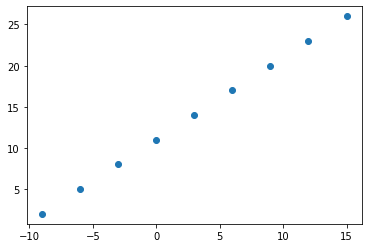

In [ ]:
plt.scatter(X,y)

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer="SGD",
              metrics=["mae"])

X = tf.expand_dims(X, axis=-1)
#3. Entrainement du modèle
model.fit(X,y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 316ms/step - loss: 9.5604 - mae: 9.5604
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 9.4604 - mae: 9.4604
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 9.3604 - mae: 9.3604
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 9.2604 - mae: 9.2604
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 9.1604 - mae: 9.1604


Remarquons que la fonction loss est en relation parfaite avec la métrice d'évaluation mae.

En efet, vu qu'il y a un seul neurone, la fonction loss est aussi son évaluation!

In [ ]:

X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[27.757627]], dtype=float32)

Souvenez-vous
Le modèle était du genre : y=X+11
- Ici, 17+11 = 29. 

Nous pouvons donc rendre notre modèle simple plus complexe en l'améliorant

## Améliorons notre modèle

1. **Créer le modèle** - Rendons le plus complex. Non pas qu'avec un perceptrons mais avec un réseau de neurone.
2. **Compiler le modele** - Changeons la fonction d'optimisation  ou peut-être le **learning rate**  de cette fonction
3. **Entrainer le modèle** - Essayeons plus d'**epochs** ( entrainant plus longtemps), ou donnons plus de **données* à apprendre au modèle.

### Changeons juste le nombre d'époch.

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X = tf.expand_dims(X, axis=-1)
#3. Entrainement du modèle
model.fit(X,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 285ms/step - loss: 9.5792 - mae: 9.5792
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4792 - mae: 9.4792
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3792 - mae: 9.3792
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2792 - mae: 9.2792
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1792 - mae: 9.1792
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 9.0792 - mae: 9.0792
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9792 - mae: 8.9792
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8792 - mae: 8.8792
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7792 - mae: 8.7792
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7334 - mae: 8.7334
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 8

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[29.83366]], dtype=float32)

Nous remarquons que notre réponse est passée de **29.979296** à **29.63065** Juste en changeant le nombre d'épochs!
- Le modèle simple a pu être amélioré rien qu'en l'entrainantb plus longtemps

### Ajoutons des neurones avant la couche de sortie (couche cachée)

In [ ]:
X,y

(<tf.Tensor: shape=(9,), dtype=float64, numpy=array([-9., -6., -3.,  0.,  3.,  6.,  9., 12., 15.])>,
 <tf.Tensor: shape=(9,), dtype=float64, numpy=array([ 2.,  5.,  8., 11., 14., 17., 20., 23., 26.])>)

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du modèle
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[29.311071]], dtype=float32)

Nous remarquons que notre réponse est passée de 29.979296 à 29.63065 Juste en changeant le nombre d'épochs!

En rajoutant des neurones nous obtenons **29.263811**, soit un résultat meilleur!


### Changeons la fonction d'optmisation

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du modèle
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[24.388887]], dtype=float32)

Et c'est là que nous voyons que nous sommes pas bon!

En effet , le learning rate de base de Adam est de 0,001.
- Il est peut-être trop petit, nous allons l'agrandir! (tendre vers 0)

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50))
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

X_train = tf.expand_dims(X, axis=-1)
y_train = y
#3. Entrainement du modèle
model.fit(X_train,y_train, epochs = 100, verbose = 0)

In [ ]:
X_test = [17.0]
X_test = tf.expand_dims(X_test, axis =1)
model.predict(X_test)

array([[28.506893]], dtype=float32)

Et biiiim, nous tendons vers les **29** que nous attendons tous!

### Que conclure ?

Nous pouvons en conclure que
- Un modèle simple donne une réponse intéressante mais pas assez
- L'entrainer sur plus de données ou plus longtemps peut avoir une importance sur la réponse du modèle
- La fonction d'optimisation agit sur la façon d'interprétger le fonctionnement du modèle
 - Choisi sa bonne fonction à du sens!
- Ajouter des neurons rend le probleme plus complex, mais plus sensible!

## Evaluons notre modèle

Ce que nous avons fait précédement est :
1. Construire le modèle;
2. Compiler le modèle;
3. Entrainer le modèle;
4. Tester le modèle;
5. Modifier le modèle;
6. Entrainer le modèle;
7. Tester le modèle;
8. Modifier le modèle;
9. Entrainer le modèle;
....
Je crois que vous avez compris.

Et ce jusqu'à ce que le modèle de réseau de neurone atteigne une valeur qui nous convie.



### Visualiser

Quand on parle d'évaluation, il faut que vous puissier visualier les choses.

Visualiser signifie
1. **Visualiser les données** : Quelle sont-elles? Avec quoi je travaille ?
2. **Visualiser le modèle** : A quoi ressemble-t-il?
3. **Visualiser l'entraineement** : Et sa réponse, ses metrics.
4. **Visualiser la prédiction** pour permettre ainsi un ajustement éventuel.

In [ ]:
X = tf.range(-102,102,3)
y = X+11
X, y

(<tf.Tensor: shape=(68,), dtype=int32, numpy=
 array([-102,  -99,  -96,  -93,  -90,  -87,  -84,  -81,  -78,  -75,  -72,
         -69,  -66,  -63,  -60,  -57,  -54,  -51,  -48,  -45,  -42,  -39,
         -36,  -33,  -30,  -27,  -24,  -21,  -18,  -15,  -12,   -9,   -6,
          -3,    0,    3,    6,    9,   12,   15,   18,   21,   24,   27,
          30,   33,   36,   39,   42,   45,   48,   51,   54,   57,   60,
          63,   66,   69,   72,   75,   78,   81,   84,   87,   90,   93,
          96,   99], dtype=int32)>,
 <tf.Tensor: shape=(68,), dtype=int32, numpy=
 array([-91, -88, -85, -82, -79, -76, -73, -70, -67, -64, -61, -58, -55,
        -52, -49, -46, -43, -40, -37, -34, -31, -28, -25, -22, -19, -16,
        -13, -10,  -7,  -4,  -1,   2,   5,   8,  11,  14,  17,  20,  23,
         26,  29,  32,  35,  38,  41,  44,  47,  50,  53,  56,  59,  62,
         65,  68,  71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101,
        104, 107, 110], dtype=int32)>)

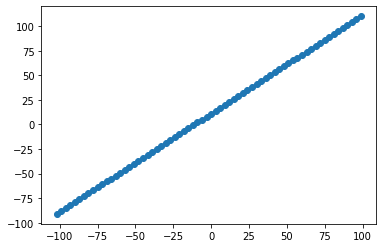

In [ ]:
plt.scatter(X,y)

### Les trois datasets

Quand nous parlons des trois datasets, nous avons 
1. **La Training Set** : Correspondant à 70-80% des données environs
2. **La Validation Set** : Correspondant au 10-15% des données suivantes. 
3. **Le Test Set** : Correspondantaux données à tester. Ceci correspond à 10-15% des données totales.

**ATTENTION** : les données contenues dans l'évaluation et le test ne peuvent pas être identique aux training set!

On n'évalue ni ne test un modèle sur les données d'entrainement!

In [ ]:
len(X)

68

In [ ]:
#Splittons les datas en Train et Test
X_Train = X[:54]
X_Test = X[54:]

y_Train = y[:54]
y_Test = y[54:]

len(X_Train), len(X_Test),len(y_Train), len(y_Test)

(54, 14, 54, 14)

### Visualisation les données d'entrainement et de test


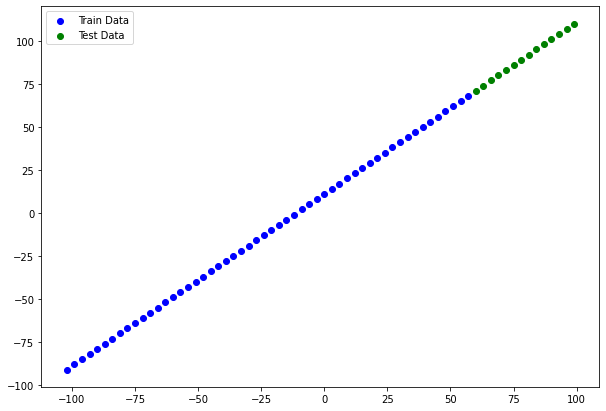

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_Train, y_Train, c='b', label='Train Data')
plt.scatter(X_Test, y_Test, c='g', label='Test Data')
plt.legend(loc='best')

Construisons donc le modèle sur les données d'entrainement.

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train
#3. Entrainement du modèle
#model.fit(X_train,y_train, epochs = 100, verbose = 1)

### Visualisons le modèle

In [ ]:
model.summary()

ValueError: ignored

**ATTENTION** - Impossible de visualiser le modèle car le lodèle ne sait pas combien il y de données d'entrées.

Pour les connaitre rapellons-nous 
- Une données X prédit une donnée y
nous pouvons dire que :

La donnée d'entrée est égale à 1

Relançons le modele

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train
#3. Entrainement du modèle
#model.fit(X_train,y_train, epochs = 100, verbose = 1)

In [ ]:
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Que voyons-nous?
1. **Total params** : nombre de parametres des neurones. (Poids et biais des neurones)
2. **Trainable params** : nombre de paramètres entrainables du modèle.
3. **Non-trainable params** : nombre de paramètres impossible à entrainer dans le modèle. On retrouve ces paramètres typiquement dans le **transfert learning**

In [ ]:
model.fit(X_train, y_train, epochs = 100, verbose = 0)

### Visualiser son modèle

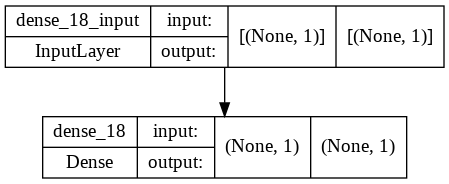

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

### Nommer son modèle

Si on construit son modèle, nous pouvons très bien nommer son modèle et ainsi le retrouver plus facilement.

- L'argument est "Name" dans la construction du modèle

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


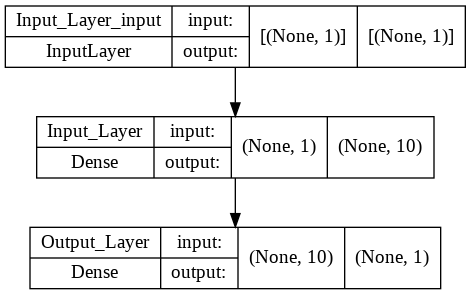

In [ ]:
# Etape 1 : Création du modèle
model = tf.keras.Sequential(name = "model_1")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"))
model.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le modèle
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr = 0.01),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train

#3. Visualisation des parametres du modèle
model.summary()
#4. Entrainement du modèle
model.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du modèle
plot_model(model = model, show_shapes = True)

Au dessus, nous pouvons voir : **Model** avec le nom que nous lui avons donné.

Aussi, chacune des couches peut être renommée.

### Visualiser la prédiction du modèle

**ATTENTION**, il faut bien distinguer `y_test`de `y_pred``.
En effet, nous avons défini `y_test``précédement.

`y_pred`servira dès lors à voir si le modèle arrive à retrouver les données de `y_test`

In [ ]:
y_pred = model.predict(X_Test)
y_pred

array([[ 69.92369 ],
       [ 72.85331 ],
       [ 75.78292 ],
       [ 78.71254 ],
       [ 81.642166],
       [ 84.571785],
       [ 87.50139 ],
       [ 90.431015],
       [ 93.36064 ],
       [ 96.29027 ],
       [ 99.21988 ],
       [102.14949 ],
       [105.079094],
       [108.00873 ]], dtype=float32)

- `y_pred` est donc la réponse du modèle pour X_Test.
- Si tout va bien ``y_pred``et `y_test` devront être proche de l'autre

In [ ]:
y_Test

<tf.Tensor: shape=(14,), dtype=int32, numpy=
array([ 71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101, 104, 107,
       110], dtype=int32)>

In [ ]:
len(y_Test), len(y_pred)

(14, 14)

In [ ]:
#visualisons les données
def Visualisation_data(train_data = X_Train, train_label = y_Train, test_data = X_Test, test_label = y_Test, pred_label = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(X_Train,y_Train, c='b', label = 'Train Data')
  plt.scatter(X_Test,y_Test, c='g', label = 'Test Data')
  plt.scatter(X_Test,y_pred, c='r', label = 'Pred Data')

  plt.legend(loc='best')


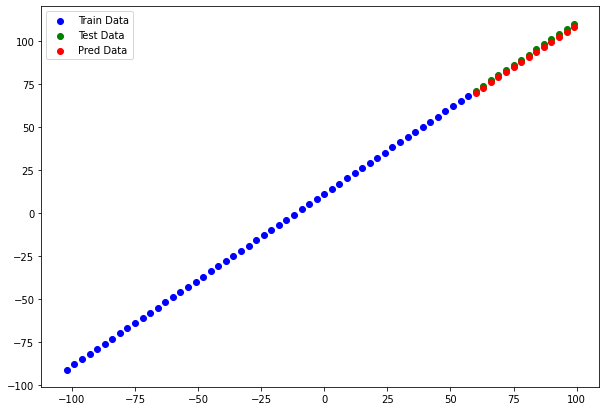

In [ ]:
Visualisation_data()

La **prediction** n'est pas si mal !

### Evaluons notre modèle avec la métric d'évaluation

Les métriques d'évaluations peuvent donner des réponses différentes en fonction de ce que l'on cherche 
- **MAE** - Mean Absolue Error
- **MSE** - Mean Squared Error
- **RMSE** - Root Mean Squared Error
- **Il en existe bien d'autres!**

In [ ]:
#Evaluons le modèle sur les données de Test
model.evaluate(X_Test, y_Test)

1/1 [==============================] - 0s 99ms/step - loss: 1.5338 - mae: 1.5338


[1.5337905883789062, 1.5337905883789062]

In [ ]:
# Calculons le MAE sur les données de prediction!
mae = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = y_pred)
mae

<tf.Tensor: shape=(14,), dtype=float32, numpy=
array([20.57631  , 17.91145  , 15.655057 , 13.80712  , 12.367643 ,
       11.336633 , 10.7140875, 10.5      , 10.694377 , 11.297219 ,
       12.308519 , 13.72828  , 15.556496 , 17.793196 ], dtype=float32)>

Nous remarquons que les différences sont grande, hors, nous avons vu dans le graph ci-avant que les différences étaient faible.
- Il y a quelque chose qui ne va pas!

In [ ]:
y_Test.shape, y_pred.shape

(TensorShape([14]), (14, 1))

In [ ]:
np.ndim(y_Test), np.ndim(y_pred)

(1, 2)

**ATTENTION AUX FORMES DES MATRICES!!!**
- y_Test est un tenseur
- y_pred est un tableau numpy...de dimension 2

Il faudra donc les mettre dans les dimensions et forme identiques.

In [ ]:
#tf.squeeze() permet de réduire la dimension de 1 de ce qu'on lui rentre 
y_pred = tf.squeeze(y_pred)

In [ ]:
y_Test.shape, y_pred.shape

(TensorShape([14]), TensorShape([14]))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5337917>

Le **mae** est donc de **1.7371722**, ce qui est un bon score

In [ ]:
mse = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.4330127>

Le **mse** est donc de **3.11594652**, ce qui est un bon score.

Nous voyons que les mse et mae sont différentes, ce qui est normal.

En effet, les métriques sont construites de façons différentes et ne signifient pas la même chose!

#Complexifions le modèle petit à petit

In [ ]:
#importons les données
X = tf.range(-102,102,3)
y = X+11

#Splittons les datas en Train et Test
X_Train = X[:54]
X_Test = X[54:]

y_Train = y[:54]
y_Test = y[54:]

### Model une couche, 100 epochs

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_Layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


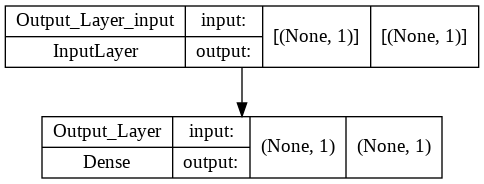

In [ ]:
# Etape 1 : Création du modèle
model_1 = tf.keras.Sequential(name = "model_1")
model_1.add(tf.keras.layers.Dense(1, input_shape = [1], name = "Output_Layer"))

#Etape 2 : Compiler le modèle
model_1.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

X_train = tf.expand_dims(X_Train, axis=-1)
y_train = y_Train

#3. Visualisation des parametres du modèle
model_1.summary()
#4. Entrainement du modèle
model_1.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du modèle
plot_model(model = model_1, show_shapes = True)

In [ ]:
y_pred_1 = model_1.predict(X_Test)

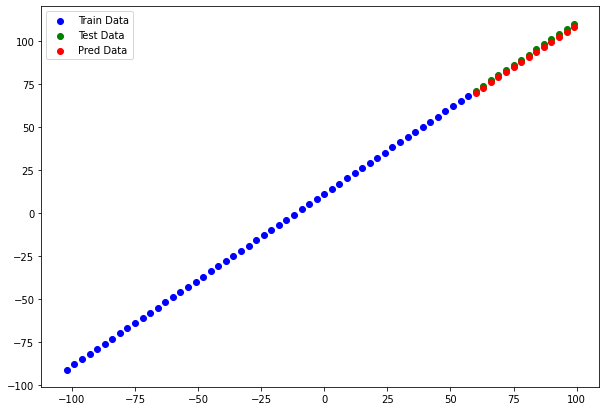

In [ ]:
Visualisation_data(pred_label = y_pred_1)

C'est sympa, mais on voit que le modèle dévie!. On pourrait l'améliorer

In [ ]:
mae_1 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred =tf.squeeze(y_pred_1))
mse_1 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.08491>,
 <tf.Tensor: shape=(), dtype=float32, numpy=447.01743>)

## Complexifions le modele

### 100 epochs et 2 couches neuronales

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


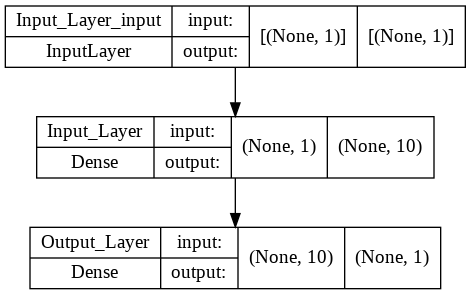

In [ ]:
# Etape 1 : Création du modèle
model_2 = tf.keras.Sequential(name = "model_2")
model_2.add(tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"))
model_2.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le modèle
model_2.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

y_train = y_Train

#3. Visualisation des parametres du modèle
model_2.summary()
#4. Entrainement du modèle
model_2.fit(X_Train,y_Train, epochs = 100, verbose = 0)

#5 Visualisation du modèle
plot_model(model = model_2, show_shapes = True)

In [ ]:
y_pred_2 = model_2.predict(X_Test)

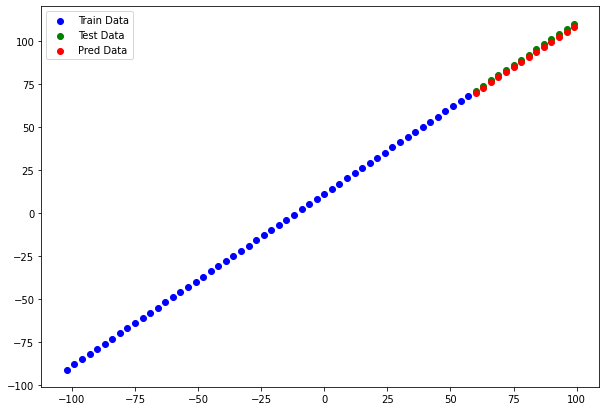

In [ ]:
Visualisation_data(pred_label = y_pred_2)

In [ ]:
mae_2 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=19.323837>,
 <tf.Tensor: shape=(), dtype=float32, numpy=375.45013>)

### Model 2 couches et 500 epochs

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


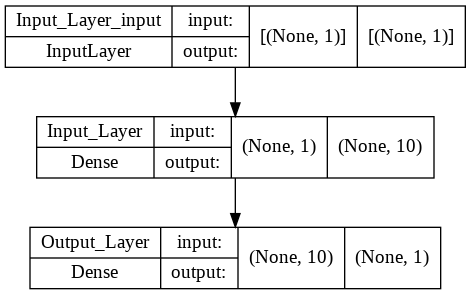

In [ ]:
# Etape 1 : Création du modèle
model_3 = tf.keras.Sequential(name = "model_3")
model_3.add(tf.keras.layers.Dense(10, input_shape = [1], name = "Input_Layer"))
model_3.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le modèle
model_3.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


#3. Visualisation des parametres du modèle
model_3.summary()
#4. Entrainement du modèle
model_3.fit(X_Train,y_Train, epochs = 500, verbose = 0)

#5 Visualisation du modèle
plot_model(model = model_3, show_shapes = True)

In [ ]:
y_pred_3 = model_3.predict(X_Test)

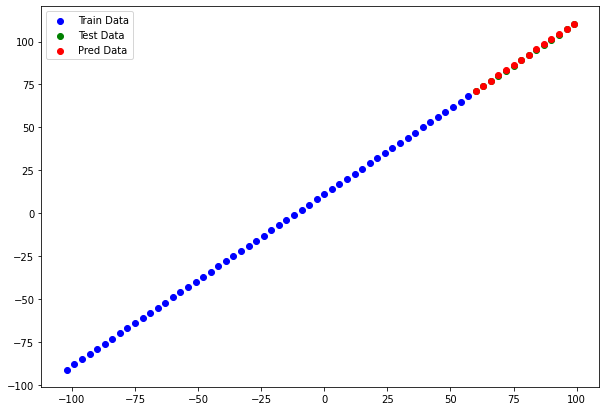

In [ ]:
Visualisation_data(pred_label = y_pred_3)

In [ ]:
mae_3 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_3))
mse_3 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.985845>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.18141>)

### Model : Couche de 50 neurone et Epoch de 500

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 50)                100       
                                                                 
 Output_Layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


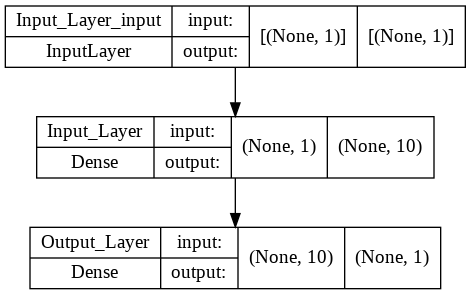

In [ ]:
# Etape 1 : Création du modèle
model_4 = tf.keras.Sequential(name = "model_4")
model_4.add(tf.keras.layers.Dense(50, input_shape = [1], name = "Input_Layer"))
model_4.add(tf.keras.layers.Dense(1, name = "Output_Layer"))

#Etape 2 : Compiler le modèle
model_4.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])


#3. Visualisation des parametres du modèle
model_4.summary()
#4. Entrainement du modèle
model_4.fit(X_Train,y_Train, epochs = 500, verbose = 0)

#5 Visualisation du modèle
plot_model(model = model_3, show_shapes = True)

In [ ]:
y_pred_4 = model_4.predict(X_Test)

In [ ]:
mae_4 = tf.metrics.mean_absolute_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_4))
mse_4 = tf.metrics.mean_squared_error(y_true = y_Test, y_pred = tf.squeeze(y_pred_4))
mae_4, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.09363447>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.18141>)

### Comparaison des résultats

Maintenant que nous avions testé plusieurs modèles, il faut pouvoir les comparer intelligement.

🔑 **Note** : Toujours commencer avec des modèles simples. Ce n'est ensuite qu'on commencera par complexifier le modèle

In [ ]:
import pandas as pd
model_results = [
    ["model 1", mae_1, mse_1],
    ["model 2", mae_2, mse_2],
    ["model 3", mae_3, mse_3],
    ["model 4", mae_4, mse_4]]

Results = pd.DataFrame(model_results, columns=['Model', 'MAE', 'MSE'])
Results

,Model,MAE,MSE
0,model 1,"tf.Tensor(21.08491, shape=(), dtype=float32)","tf.Tensor(447.01743, shape=(), dtype=float32)"
1,model 2,"tf.Tensor(19.323837, shape=(), dtype=float32)","tf.Tensor(375.45013, shape=(), dtype=float32)"
2,model 3,"tf.Tensor(8.985845, shape=(), dtype=float32)","tf.Tensor(81.18141, shape=(), dtype=float32)"
3,model 4,"tf.Tensor(0.09363447, shape=(), dtype=float32)","tf.Tensor(0.008997126, shape=(), dtype=float32)"


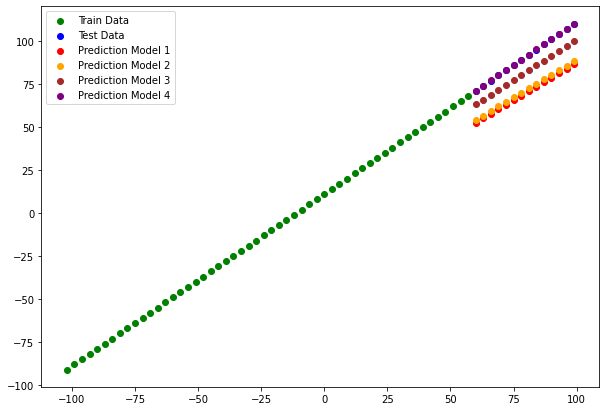

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_Train, y_Train, c = 'g', label = 'Train Data')
plt.scatter(X_Test, y_Test, c = 'b', label = 'Test Data')
plt.scatter(X_Test, y_pred_1, c = 'red', label = 'Prediction Model 1')
plt.scatter(X_Test, y_pred_2, c = 'orange', label = 'Prediction Model 2')
plt.scatter(X_Test, y_pred_3, c = 'brown', label = 'Prediction Model 3')
plt.scatter(X_Test, y_pred_4, c = 'purple', label = 'Prediction Model 4')
plt.legend(loc='best')

🔑 **Remarque** - Nous pouvons voir clairement que l'évolution des facteurs du modèle influence le résultat

🏅 Le **model 4** est clairement le meilleur.


# Sauvegarder et charger son modele

## Sauvegarder le modèle

Sauvegarder son modele permet de pouvoir l'utliser quelque part.

En effet, que ce soit un modèle à partager ou un modèle à envoyer dans une application.

Si vous n'enregistrez pas votre modèle, il ne servira à rien.

Il existe deux méthode d'enregistrement de votre modèle :
- Le format MODELE `.model`, modèle sauvé par défaut par Tensorflow
- Le HDF File. `.hdf`


### Le format Model

In [ ]:
model_4.save("Model_Regression_linéaire_simple_SavedModel")

### Le format HDF

In [ ]:
model_4.save("Model_Regression_linéaire_simple_HDF.h5")

**Où se trouvent les modèles enregistrés ?**

Ils sont dans collab où dans le dossier que vous avez donné.

Dans collab, nous les trouverons ici :

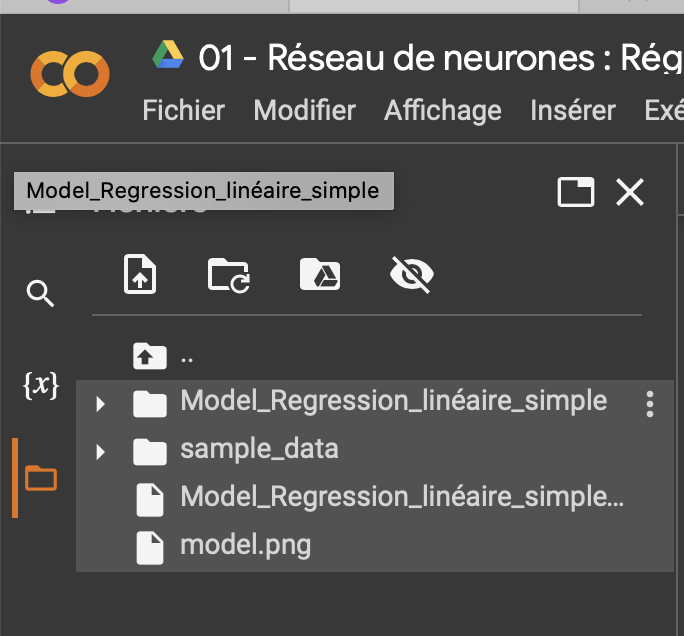

## Charger son modèle

In [ ]:
loaded_savedformat_model = tf.keras.models.load_model("/content/Model_Regression_linéaire_simple_SavedModel")
loaded_hdf_model = tf.keras.models.load_model("content/Model_Regression_linéaire_simple_HDF.h5")

OSError: ignored